<a href="https://colab.research.google.com/github/jecklin1sampai9/Tim-Jeki-Image_classification_tubuh/blob/main/Image_classification_Tubuh_tim_jeki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [3]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 212 kB 77.7 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 2.3 MB 54.8 MB/s 
     |████████████████████████████████| 141 kB 49.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 275 kB 46.3 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 68 kB 7.1 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 4.1 MB 42.7 MB/s 
     |████████████████████████████████| 856 kB 58.

In [4]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [5]:
data_dir = '/content/drive/MyDrive/Klasifikasi Tubuh'
print(data_dir)

/content/drive/MyDrive/Klasifikasi Tubuh


In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 301 files belonging to 3 classes.
Using 241 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 301 files belonging to 3 classes.
Using 60 files for validation.


In [8]:
for image_batch, label_batch in train_ds.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(32, 180, 180, 3)
tf.Tensor(
[[[111.51878   98.51878   92.51878 ]
  [109.09366  102.09366   86.09366 ]
  [118.413345 107.896675  89.735565]
  ...
  [100.079346  99.079346  78.16215 ]
  [ 94.79404   93.57724   63.433914]
  [104.07096  102.89209   79.48152 ]]

 [[121.369446 105.96388   92.96388 ]
  [111.9143    99.9143    85.9143  ]
  [113.22337  101.22337   85.22337 ]
  ...
  [102.48976   99.48976   80.48976 ]
  [105.66396  100.77236   78.44717 ]
  [103.98761  101.98761   78.98761 ]]

 [[119.31944  103.211105  93.02948 ]
  [115.481705 101.481705  90.8706  ]
  [115.21411  103.21411   91.21411 ]
  ...
  [101.02509   98.02509   79.02509 ]
  [106.93804  101.93804   81.93804 ]
  [101.96629  100.96629   80.160736]]

 ...

 [[129.2154   109.30267   96.71958 ]
  [123.22558  100.808586  92.61425 ]
  [121.38678   98.96979   92.77545 ]
  ...
  [132.73363  140.95038  156.34201 ]
  [129.24065  139.56613  151.97586 ]
  [130.66911  139.66911  156.66911 ]]

 [[126.4834   103.18617   89.780624]
  [126.1

In [9]:
class_names = train_ds.class_names
print(class_names)

['kaki', 'mata', 'tangan']


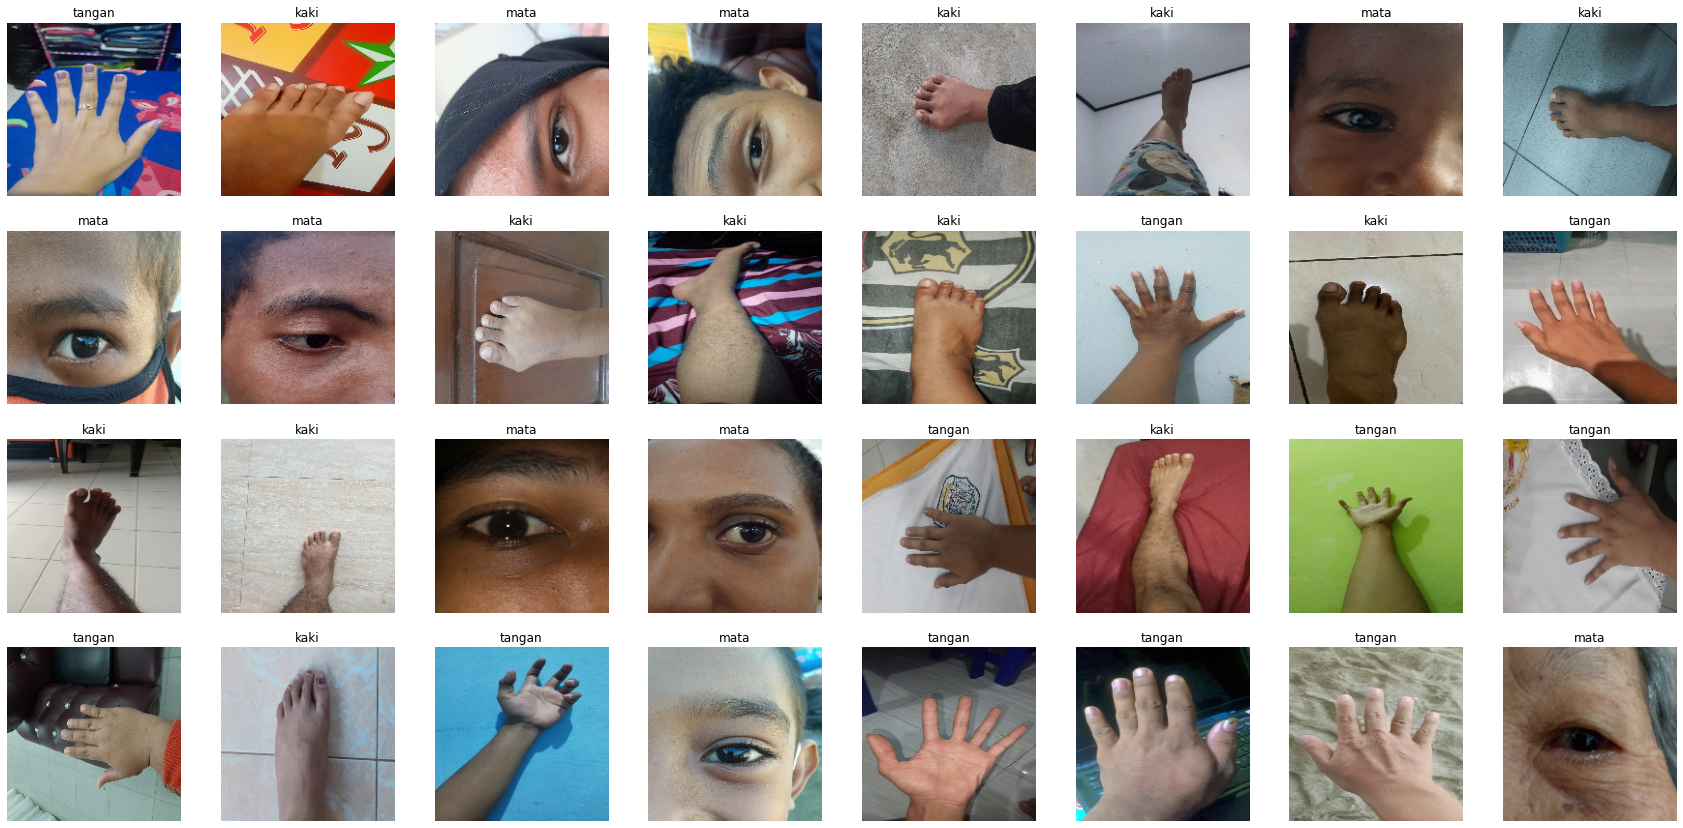

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(batch_size):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
num_classes = 3

model = models.Sequential([
    # data_augmentation
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,  kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,  kernel_size = (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        3

In [14]:
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=20
)

Epoch 1/20
8/8 [==============================] - 27s 3s/step - loss: 1.1024 - accuracy: 0.2946 - val_loss: 1.0973 - val_accuracy: 0.3000
Epoch 2/20
8/8 [==============================] - 18s 2s/step - loss: 1.0985 - accuracy: 0.3485 - val_loss: 1.0981 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 1.0948 - accuracy: 0.3900 - val_loss: 1.0974 - val_accuracy: 0.3000
Epoch 4/20
8/8 [==============================] - 18s 2s/step - loss: 1.0931 - accuracy: 0.3942 - val_loss: 1.0818 - val_accuracy: 0.3500
Epoch 5/20
8/8 [==============================] - 20s 2s/step - loss: 1.0611 - accuracy: 0.3983 - val_loss: 1.0110 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.9389 - accuracy: 0.5436 - val_loss: 0.8781 - val_accuracy: 0.5667
Epoch 7/20
8/8 [==============================] - 21s 2s/step - loss: 0.8347 - accuracy: 0.6017 - val_loss: 0.8354 - val_accuracy: 0.5333
Epoch 8/20
8/8 [==================

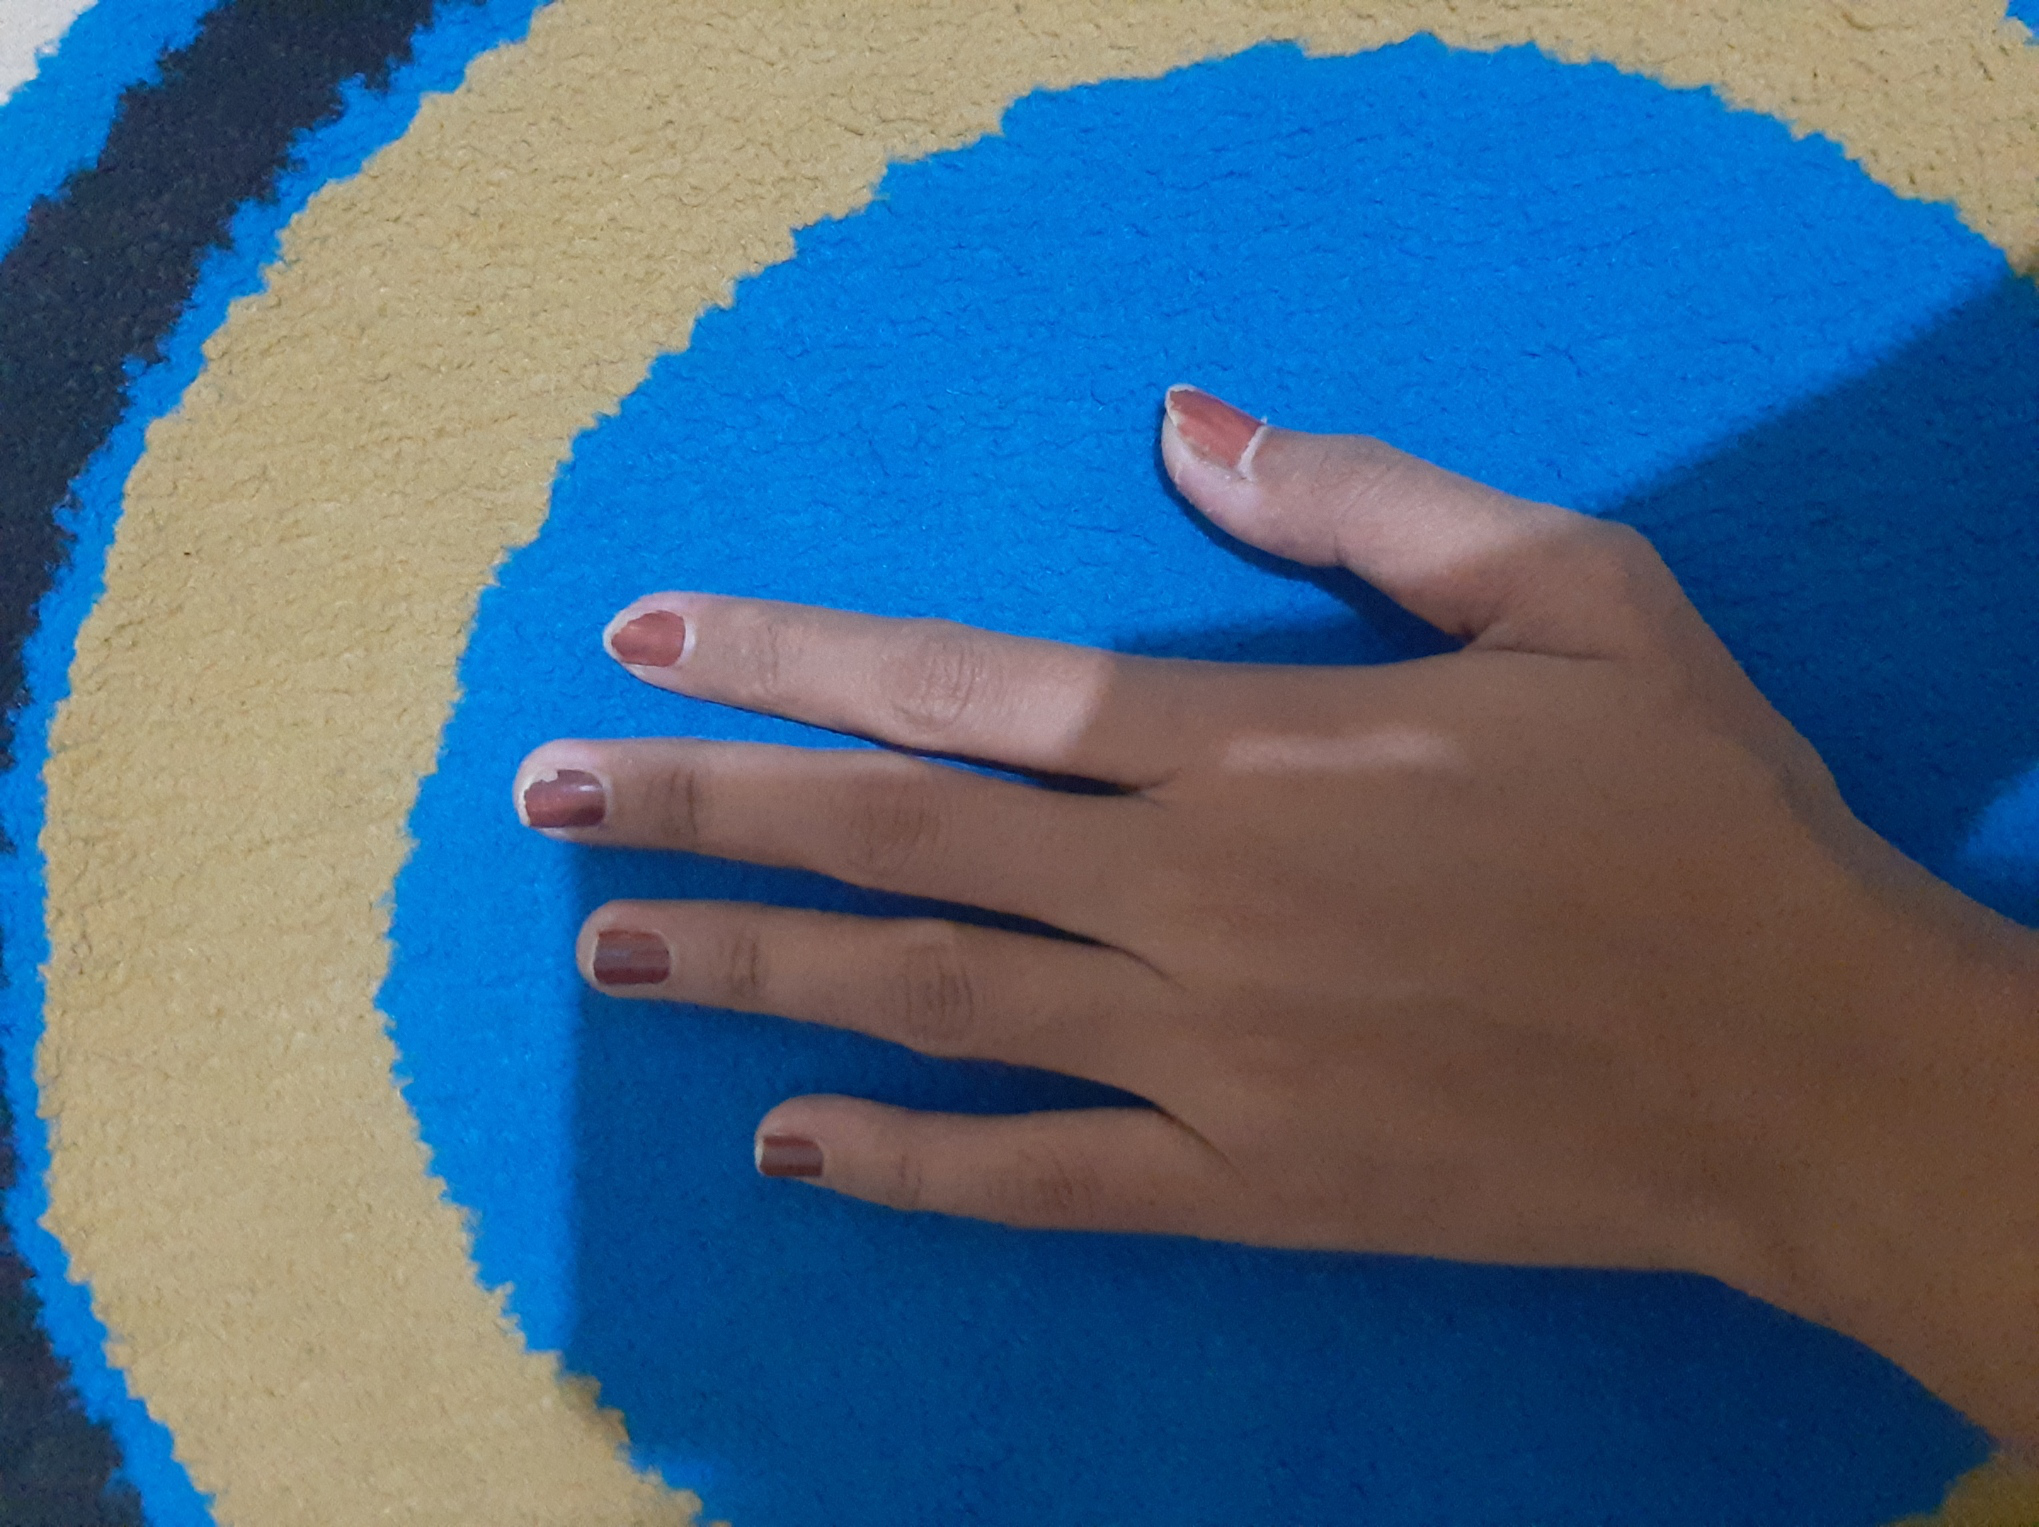

In [15]:
image_path = "/content/drive/MyDrive/Klasifikasi Tubuh/tangan/tangan (100).jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [16]:
import gradio as gr

In [17]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://52146.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
